In [178]:
# import pandas using the alias pd
import pandas as pd

# import numpy using the alias np
import numpy as np

# import matplotlib.pyplot using the alias plt
import matplotlib.pyplot as plt

# call the magic function to display matplotlib plots inline
%matplotlib inline

In [179]:
# useful stuff for later

# make sure these files are the names of the files you have (you may need to add .gz to the end)
# putting the filenames in variables so they can be modified once without having to be updated
# everywhere else.
tmdb_movies = 'tmdb.movies.csv.gz'
movie_budgets = 'tn.movie_budgets.csv.gz'

genre_ids = {'10402':'music', 
             '10749':'romance', 
             '10751':'family', 
             '10752':'war', 
             '10770':'tv_movie', 
             '12':'adventure', 
             '14':'fantasy', 
             '16':'animation', 
             '18':'drama', 
             '27':'horror', 
             '28':'action', 
             '35':'comedy', 
             '36':'history', 
             '37':'western', 
             '53':'thriller', 
             '80':'crime', 
             '878':'science_fiction', 
             '9648':'mystery', 
             '99':'documentary',
             '':'UNK'}

# make a list of the genres to use as column titles
genre_list = list(sorted(genre_ids.values()))

def split_genres(genre_id_list):
    return [genre_ids[genre_id] for genre_id in genre_id_list.strip('[]').split(', ')]

In [180]:
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [181]:
# this function can be used to give you a quick preview of your dataframe, to make sure
# small changes (like changing the dtype of a column) are having the effect you want

def preview_data(df):
    # print the result of calling df.info(), to see what types of data you have
    print(df.info())
    # return the first few rows (the head) of df
    return df.head()

# here's some test data so you can see if preview_data is working correctly
test_df = pd.DataFrame([{'a':2, 'b':-7, 'c':12}, {'a':'4', 'b':13, 'c':-1}, {'a':1.5, 'b':10, 'c':-999}])

# call preview_data and pass it test_df to see what happens
preview_data(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       3 non-null      object
 1   b       3 non-null      int64 
 2   c       3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes
None


,a,b,c
0,2,-7,12
1,4,13,-1
2,1.5,10,-999


In [182]:
# this function is used later, to convert a column of strings like, ''$400,000,000' into
# floats that can be used in math, like 400000000

def clean_money_string(amount):
    # if the type of the variable "amount" is str
    # first, replace the commas ',' in the string with ''
    # next, strip the dollar sign '$' from the string
    # finally, convert the string to a float
    # return the converted value
    # if the type of the variable "amount" is not a string, just return amount
    if type(amount) == str:
        a = amount.replace(',', '').strip('$')
        b = float(a)
        return b
    if type(amount) != str:
        return amount

# test the function clean_money_string to see if it's doing what you think it is
# see what is returned when you pass it '$500,000,000'
# see what is returned when you pass it 500000000
# see what the type of the return value is (it should be float)

clean_money_string('$500,000,000')


500000000.0

In [183]:
#saving
#return(float(amount.replace(',', '').strip('$')))

In [184]:
preview_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [185]:
def get_tm_movie_budgets():
    #create a dataframe, read the file whose name is stored as variable movie_budgets
    #check datatypes of columns and change to appropriate types
    #clean money columns using .apply and make new cols
    #create month and year columns
    #create a column for profitability = (worldwide gross - budget)/budget
    #create a new dataframe showing only the relevant columns
    df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
    df['release_date'] = df['release_date'].astype('datetime64[ns]')   
    
    df['prod_budget_in_mil'] = (df['production_budget'].apply(clean_money_string))/1000000
    
    df['world_gross_in_mil'] = round(((df['worldwide_gross'].apply(clean_money_string))/1000000), 1)
    
    df['month'] = df['release_date'].apply(lambda x: x.month)
    df['year'] = df['release_date'].apply(lambda x: x.year) 
      
    df['profitability'] = round(((df['world_gross_in_mil'] - df['prod_budget_in_mil'])/ df['prod_budget_in_mil']), 1)
    df_clean = df[['movie', 'release_date', 'month', 'year', 'prod_budget_in_mil', 'world_gross_in_mil', 'profitability']]
    return df_clean
df_clean = get_tm_movie_budgets()
preview_data(df_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie               5782 non-null   object        
 1   release_date        5782 non-null   datetime64[ns]
 2   month               5782 non-null   int64         
 3   year                5782 non-null   int64         
 4   prod_budget_in_mil  5782 non-null   float64       
 5   world_gross_in_mil  5782 non-null   float64       
 6   profitability       5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 316.3+ KB
None


,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability
0,Avatar,2009-12-18,12,2009,425.0,2776.3,5.5
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,410.6,1045.7,1.5
2,Dark Phoenix,2019-06-07,6,2019,350.0,149.8,-0.6
3,Avengers: Age of Ultron,2015-05-01,5,2015,330.6,1403.0,3.2
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,12,2017,317.0,1316.7,3.2


In [186]:
df_clean.prod_budget_in_mil.value_counts()

20.000000    231
10.000000    212
30.000000    177
15.000000    173
25.000000    171
            ... 
6.750000       1
6.250000       1
0.009000       1
0.385907       1
12.800000      1
Name: prod_budget_in_mil, Length: 509, dtype: int64

In [187]:
# this function will load the information from tmdb.movies.csv
# create a dataframe called df, and use read_csv to read in the data from the file whose name is stored
    # in tmdb_movies
    # convert the 'release_date' column into datetime format
    # preview the data returned by tmdb_movies once you have code that returns a dataframe
# preview_data(get_tmdb_movies())
def get_tmdb_movies():
    genres = pd.read_csv('zippedData/tmdb.movies.csv.gz')
    genres['release_date'] = genres['release_date'].astype('datetime64[ns]')   
    return genres

df2 = get_tmdb_movies()
preview_data(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [188]:
#Make a function to split the genres  ******

#Dan code to split genres
def split_genres(genre_id_list):
    return [genre_ids[genre_id] for genre_id in genre_id_list.strip('[]').split(', ')]

split_genres('[12, 14, 10751]')

['adventure', 'fantasy', 'family']

In [189]:
# function to split genres into different columns

def get_title_and_genres():
    df = get_tmdb_movies() #use a function to get data in cleaned form
    df[df['original_language'] == 'en'] #select only rows where english is the language using boolean mask
    df = df[['title', 'genre_ids']] #make a dataframe of only title and genre ids
    df['genres'] = df.genre_ids.apply(split_genres) #make a new dataframe using the split genres function 
    for genre in genre_list: #looping through genre_list created above, putting each value in genre_list in the variable called genre
        df[genre] = df.genres.apply(lambda x: genre in x) #Dan I don't understand left side
        
    #The left side makes a new column in df whose name is whatever value is in that variable, 
    #and the right side returns True if that genre is in the column called genres.     
             
    return df.drop(['genres', 'genre_ids'], axis=1) #drop the original columns now that there is one col per genre

    # Dan's explanation
    # this function is going to do a lot of the important work for us when it comes to 
    # analyzing specific genres.
    # now keep only the movies with 'en' in the 'original_language' column
    # now drop all columns except for 'title' and 'genre_ids'
    # create a new column called 'genres' by splitting the 'genre_ids' column, 
    # now we're going to iterate through genre_list. for each genre in genre_list, 
    # create a new column with the name of that genre, and assign it a value by calling
    # the apply method on the genres column, and passing it a lambda function that will
    # take a variable "x", and check to see if genre is in "x".
    # this is checking to see if the genre is in the list of genres for the movie, and assigning
    # True if the genre is in the last, and False otherwise
    # now you can drop 'genres' and 'genre_ids' from axis 1 and return the dataframe

df_bool = get_title_and_genres()
    
preview_data(df_bool)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            26517 non-null  object
 1   UNK              26517 non-null  bool  
 2   action           26517 non-null  bool  
 3   adventure        26517 non-null  bool  
 4   animation        26517 non-null  bool  
 5   comedy           26517 non-null  bool  
 6   crime            26517 non-null  bool  
 7   documentary      26517 non-null  bool  
 8   drama            26517 non-null  bool  
 9   family           26517 non-null  bool  
 10  fantasy          26517 non-null  bool  
 11  history          26517 non-null  bool  
 12  horror           26517 non-null  bool  
 13  music            26517 non-null  bool  
 14  mystery          26517 non-null  bool  
 15  romance          26517 non-null  bool  
 16  science_fiction  26517 non-null  bool  
 17  thriller         26517 non-null

,title,UNK,action,adventure,animation,comedy,crime,documentary,drama,family,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
0,Harry Potter and the Deathly Hallows: Part 1,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,How to Train Your Dragon,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Iron Man 2,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,Toy Story,False,False,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Inception,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [190]:
#for reference
df = get_tmdb_movies()
df['original_language'] == 'en'

# When you do df[some boolean mask], it returns only the rows from df that are True in the boolean mask.
# So the df[df[ means “return only the rows from df corresponding to True in this boolean mask.

0        True
1        True
2        True
3        True
4        True
         ... 
26512    True
26513    True
26514    True
26515    True
26516    True
Name: original_language, Length: 26517, dtype: bool

## Merging the DataFrames

In [191]:
# this function will merge the previous two dataframes into one big dataframe.
# create two dataframes. one should get the dataframe from get_tm_movie_budgets, and the other should
# get the dataframe from get_title_and_genres.
# we are calling get_title_and_genres df_bool
# we are calling get_tm_movie_budgets df_clean
# create a new dataframe by merging the two dataframes above. you want to merge the budgets dataframe
# on the 'movie' column and the genres dataframe on the 'title' column. 

def merge_budgets_and_genres():
    df = df_clean.merge(df_bool, how ='inner', left_on='movie', right_on='title')
    return df

#merge_budgets_and_genres()
    
    # you'll have a duplicate column, so drop 'title' from axis 1 once you've merged.
    # bonus: do this all in one line    
    # there are some duplicates in the dataset. drop duplicates that match on 'movie' and 'rd'
        
    # sort_values by the 'movie' column and return the dataframe

# preview the dataframe


merged_df = merge_budgets_and_genres().drop_duplicates(subset=['movie', 'release_date'], keep=False).drop(['title'], axis=1)
preview_data(merged_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 0 to 2384
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie               1641 non-null   object        
 1   release_date        1641 non-null   datetime64[ns]
 2   month               1641 non-null   int64         
 3   year                1641 non-null   int64         
 4   prod_budget_in_mil  1641 non-null   float64       
 5   world_gross_in_mil  1641 non-null   float64       
 6   profitability       1641 non-null   float64       
 7   UNK                 1641 non-null   bool          
 8   action              1641 non-null   bool          
 9   adventure           1641 non-null   bool          
 10  animation           1641 non-null   bool          
 11  comedy              1641 non-null   bool          
 12  crime               1641 non-null   bool          
 13  documentary         1641 non-null   bool        

,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability,UNK,action,adventure,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
0,Avatar,2009-12-18,12,2009,425.0,2776.3,5.5,False,True,True,...,False,False,False,False,False,True,False,False,False,False
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,410.6,1045.7,1.5,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Avengers: Age of Ultron,2015-05-01,5,2015,330.6,1403.0,3.2,False,True,True,...,False,False,False,False,False,True,False,False,False,False
3,Avengers: Infinity War,2018-04-27,4,2018,300.0,2048.1,5.8,False,True,True,...,False,False,False,False,False,False,False,False,False,False
8,The Dark Knight Rises,2012-07-20,7,2012,275.0,1084.4,2.9,False,True,False,...,False,False,False,False,False,False,True,False,False,False


## Calculate Mean Profitability by Genre

In [192]:
#mean profitability for science fiction 
merged_df[merged_df['science_fiction']]['profitability'].mean()

2.5188481675392667

In [193]:
merged_df['science_fiction']== True

0        True
1       False
2        True
3       False
8       False
        ...  
2380    False
2381    False
2382    False
2383     True
2384    False
Name: science_fiction, Length: 1641, dtype: bool

In [194]:
merged_df['science_fiction'].isna().sum()

0

In [195]:
merged_df['prod_budget_in_mil'].isna().sum()

0

In [196]:
merged_df['prod_budget_in_mil']>=100

0        True
1        True
2        True
3        True
8        True
        ...  
2380    False
2381    False
2382    False
2383    False
2384    False
Name: prod_budget_in_mil, Length: 1641, dtype: bool

### Mean of SciFi Profitability

In [197]:
#first make a new df with only the sci fi movies > $100m budget
scifi_over_100 = merged_df[(merged_df['science_fiction']== True) & (merged_df['prod_budget_in_mil'] >= 100)]
scifi_over_100.head()

,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability,UNK,action,adventure,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
0,Avatar,2009-12-18,12,2009,425.0,2776.3,5.5,False,True,True,...,False,False,False,False,False,True,False,False,False,False
2,Avengers: Age of Ultron,2015-05-01,5,2015,330.6,1403.0,3.2,False,True,True,...,False,False,False,False,False,True,False,False,False,False
9,Solo: A Star Wars Story,2018-05-25,5,2018,275.0,393.2,0.4,False,True,True,...,False,False,False,False,False,True,False,False,False,False
11,John Carter,2012-03-09,3,2012,275.0,282.8,0.0,False,True,True,...,False,False,False,False,False,True,False,False,False,False
13,Captain America: Civil War,2016-05-06,5,2016,250.0,1140.1,3.6,False,True,True,...,False,False,False,False,False,True,False,False,False,False


In [198]:
#now calculate mean of the scifi database 
round(np.mean(scifi_over_100['profitability']),1)

2.2

### Mean of Family Profitability

In [199]:
#Make family dataframe
family_over_100 = merged_df[(merged_df['family']== True) & (merged_df['prod_budget_in_mil'] >= 100)]
family_over_100.head()

,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability,UNK,action,adventure,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
12,Tangled,2010-11-24,11,2010,260.0,586.5,1.3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37,Incredibles 2,2018-06-15,6,2018,200.0,1242.5,5.2,False,True,True,...,False,False,False,False,False,False,False,False,False,False
40,Finding Dory,2016-06-17,6,2016,200.0,1021.2,4.1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
41,Toy Story 3,2010-06-18,6,2010,200.0,1068.9,4.3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48,Monsters University,2013-06-21,6,2013,200.0,743.6,2.7,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [200]:
#now calculate mean of the family database 
round(np.mean(family_over_100['profitability']),1)

2.0

### Mean of Animation Profitability

In [201]:
#make animation dataframe
animation_over_100 = merged_df[(merged_df['animation']== True) & (merged_df['prod_budget_in_mil'] >= 100)]
animation_over_100.head()

,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability,UNK,action,adventure,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
12,Tangled,2010-11-24,11,2010,260.0,586.5,1.3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37,Incredibles 2,2018-06-15,6,2018,200.0,1242.5,5.2,False,True,True,...,False,False,False,False,False,False,False,False,False,False
40,Finding Dory,2016-06-17,6,2016,200.0,1021.2,4.1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
41,Toy Story 3,2010-06-18,6,2010,200.0,1068.9,4.3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48,Monsters University,2013-06-21,6,2013,200.0,743.6,2.7,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [202]:
#now calculate mean of the animation database 
round(np.mean(animation_over_100['profitability']),1)

2.4

In [224]:
## ADVENTURE
adventure_over_100 = merged_df[(merged_df['adventure']== True) & (merged_df['prod_budget_in_mil'] >= 100)]
round(np.mean(adventure_over_100['profitability']),1)

2.2

In [225]:
## THRILLER
thriller_over_100 = merged_df[(merged_df['thriller']== True) & (merged_df['prod_budget_in_mil'] >= 100)]
round(np.mean(thriller_over_100['profitability']),1)

2.4

### Mean of Fantasy Profitability

In [203]:
# make fantasy dataframe over $100M budget
fantasy_over_100 = merged_df[(merged_df['fantasy']== True) & (merged_df['prod_budget_in_mil'] >= 100)]
fantasy_over_100.head()

,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability,UNK,action,adventure,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
0,Avatar,2009-12-18,12,2009,425.0,2776.3,5.5,False,True,True,...,False,False,False,False,False,True,False,False,False,False
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,410.6,1045.7,1.5,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Avengers: Infinity War,2018-04-27,4,2018,300.0,2048.1,5.8,False,True,True,...,False,False,False,False,False,False,False,False,False,False
14,Batman v Superman: Dawn of Justice,2016-03-25,3,2016,250.0,867.5,2.5,False,True,True,...,False,False,False,False,False,False,False,False,False,False
15,The Hobbit: An Unexpected Journey,2012-12-14,12,2012,250.0,1017.0,3.1,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [204]:
#now calculate mean of the fantasy database 
round(np.mean(fantasy_over_100['profitability']),1)

1.9

#### Calculating Percent Above Break Even Line

In [205]:
profitable_fantasy = fantasy_over_100[(fantasy_over_100['prod_budget_in_mil'] < fantasy_over_100['world_gross_in_mil'])]
round((len(profitable_fantasy) / (len(fantasy_over_100))),2)*100

92.0

In [206]:
len(profitable_fantasy)

57

In [207]:
len(fantasy_over_100)

62

## Making a Function to Calculate Percent Profitability

In [208]:
def percent_profitable(genre, dataframe):
    genre_over_100 = merged_df[(merged_df[genre]== True) & (merged_df['prod_budget_in_mil'] >= 100)]
        
    profitable_genre = genre_over_100[(genre_over_100['prod_budget_in_mil'] < genre_over_100['world_gross_in_mil'])]
    if len(genre_over_100) > 0:
        percent_profitable = round((len(profitable_genre) / (len(genre_over_100))),2)*100
        return percent_profitable
    else:  
        return 0
    
percent_profitable('fantasy', merged_df)

92.0

In [209]:
percent_profitable('tv_movie', merged_df)

0

In [210]:
col_list = merged_df.columns
col_list2 = col_list[8:-1]

In [211]:
#start by asking yourself what your output is
#list or series of profitability numbers, one number for each genre

def percent_profitable_all(dataframe):
    dicta = {}
    for item in col_list2:
        dicta[item] = percent_profitable(item, dataframe)
    return dicta
    
    #for dataframe['genre'] in dataframe:
        #dicta['merged_df[genre]'] = merged_df[percent_profitable(genre, dataframe)]
          
percent_profitable_all(merged_df)

{'action': 95.0,
 'adventure': 95.0,
 'animation': 97.0,
 'comedy': 95.0,
 'crime': 92.0,
 'documentary': 100.0,
 'drama': 87.0,
 'family': 96.0,
 'fantasy': 92.0,
 'history': 0,
 'horror': 80.0,
 'music': 0,
 'mystery': 100.0,
 'romance': 100.0,
 'science_fiction': 97.0,
 'thriller': 97.0,
 'tv_movie': 0,
 'war': 75.0}

### finding a particular movie

In [ ]:
merged_df['Godzilla']

In [216]:
merged_df[merged_df['movie'] == 'Godzilla']

,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability,UNK,action,adventure,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
126,Godzilla,2014-05-16,5,2014,160.0,529.1,2.3,False,True,False,...,False,False,False,False,False,True,False,False,False,False
127,Godzilla,1998-05-19,5,1998,125.0,376.0,2.0,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [223]:
merged_df[merged_df['movie'] == 'Avatar']

,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability,UNK,action,adventure,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
0,Avatar,2009-12-18,12,2009,425.0,2776.3,5.5,False,True,True,...,False,False,False,False,False,True,False,False,False,False


## ScatterPlot: Budget vs. Worldwide Gross

In [18]:
preview_data(df_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie               5782 non-null   object        
 1   release_date        5782 non-null   datetime64[ns]
 2   month               5782 non-null   int64         
 3   year                5782 non-null   int64         
 4   prod_budget_in_mil  5782 non-null   float64       
 5   world_gross_in_mil  5782 non-null   float64       
 6   profitability       5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 316.3+ KB
None


,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability
0,Avatar,2009-12-18,12,2009,425.0,2776.3,5.5
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,410.6,1045.7,1.5
2,Dark Phoenix,2019-06-07,6,2019,350.0,149.8,-0.6
3,Avengers: Age of Ultron,2015-05-01,5,2015,330.6,1403.0,3.2
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,12,2017,317.0,1316.7,3.2


Text(0, 0.5, 'Profitability in Multiples of Production Budget')

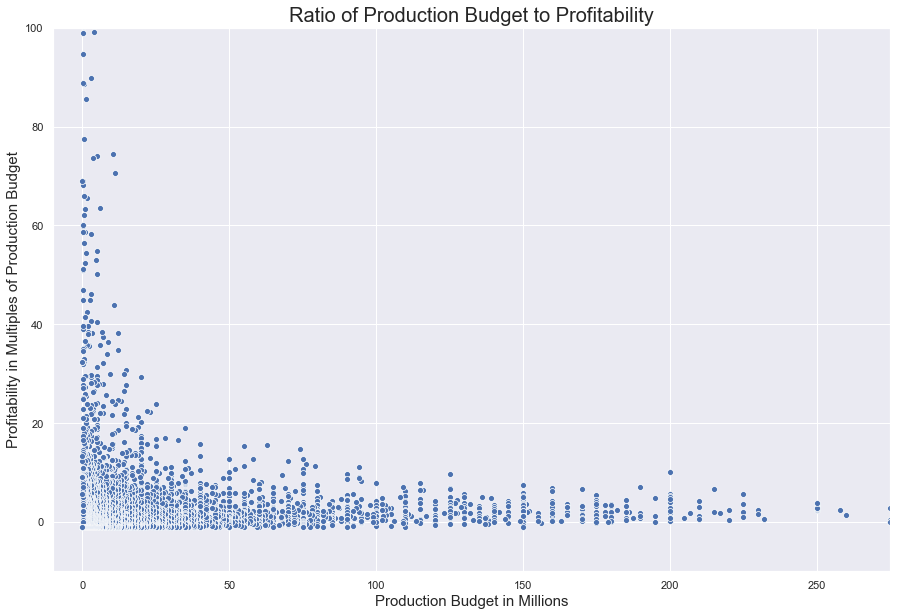

In [19]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

#ax object
ax = sns.scatterplot(x = df_clean['prod_budget_in_mil'], y = df_clean['profitability'])\
.set_title('Ratio of Production Budget to Profitability', fontsize=20)

plt.xlim(-10, 275)
plt.ylim(-10, 100)
plt.xlabel('Production Budget in Millions', fontsize=15)
plt.ylabel('Profitability in Multiples of Production Budget', fontsize=15) 


# hue='genre_ids'

#sns.set_style("ticks")
#sns.set()
#plt.show(fig)
#plt.figure(figsize=(15,10))
#fig.set_figheight(4)
#fig.set_figwidth(6)

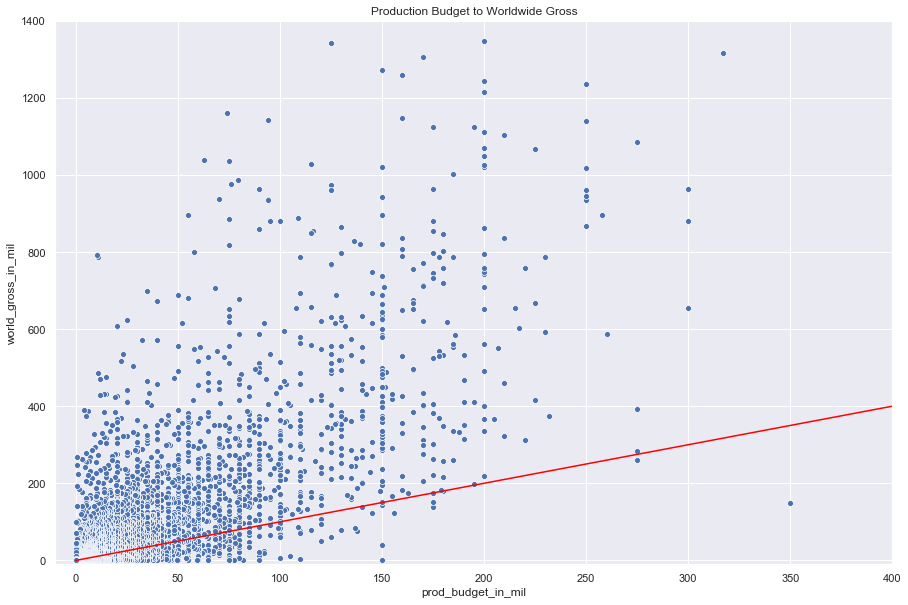

In [20]:
# scatter budget vs worldwide gross
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
fig = sns.scatterplot(x = df_clean['prod_budget_in_mil'], y = df_clean['world_gross_in_mil'])\
.set_title('Production Budget to Worldwide Gross')
plt.xlim(-10, 400)
plt.ylim(-10, 1400)
plt.plot([0,400], [0,400], color = 'red')
plt.show(fig)
sns.set()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a1285e390>,
      dtype=object)

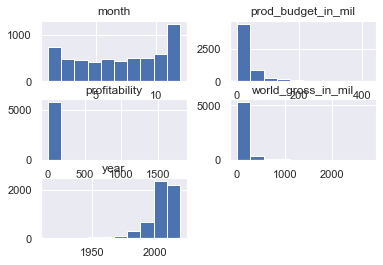

In [21]:
df_clean.hist()

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 0 to 2384
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie               1641 non-null   object        
 1   release_date        1641 non-null   datetime64[ns]
 2   month               1641 non-null   int64         
 3   year                1641 non-null   int64         
 4   prod_budget_in_mil  1641 non-null   float64       
 5   world_gross_in_mil  1641 non-null   float64       
 6   profitability       1641 non-null   float64       
 7   UNK                 1641 non-null   bool          
 8   action              1641 non-null   bool          
 9   adventure           1641 non-null   bool          
 10  animation           1641 non-null   bool          
 11  comedy              1641 non-null   bool          
 12  crime               1641 non-null   bool          
 13  documentary         1641 non-null   bool        

In [23]:
merged_df.shape\

(1641, 27)

In [24]:
merged_df['year'].value_counts()

2011    197
2015    186
2014    183
2013    183
2012    178
2010    170
2016    125
2018    108
2017     88
2009     17
2005     14
2000     11
2008     11
2004     10
2002     10
2019     10
2006     10
1999     10
2003      9
1997      9
1998      8
1996      8
2001      8
2007      8
1984      6
1994      5
1990      5
1980      5
1981      5
1982      5
1995      4
1983      2
1956      2
1977      2
1978      2
1979      2
1968      2
1986      2
1988      2
1989      2
1991      2
1993      2
1959      1
1945      1
1948      1
1953      1
1946      1
1992      1
1967      1
1972      1
1974      1
1975      1
1985      1
1987      1
1944      1
Name: year, dtype: int64

In [42]:
merged_df.loc[[0]]

,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability,UNK,action,adventure,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
0,Avatar,2009-12-18 00:00:00,12,2009,425,2776.3,5.5,False,True,True,...,False,False,False,False,False,True,False,False,False,False


## Find Percent of Movies that Do Not Break Even

In [48]:
preview_data(merged_df)

<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, 0 to Movie
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie               1642 non-null   object
 1   release_date        1642 non-null   object
 2   month               1642 non-null   object
 3   year                1642 non-null   object
 4   prod_budget_in_mil  1642 non-null   object
 5   world_gross_in_mil  1642 non-null   object
 6   profitability       1642 non-null   object
 7   UNK                 1642 non-null   object
 8   action              1642 non-null   object
 9   adventure           1642 non-null   object
 10  animation           1642 non-null   object
 11  comedy              1642 non-null   object
 12  crime               1642 non-null   object
 13  documentary         1642 non-null   object
 14  drama               1642 non-null   object
 15  family              1642 non-null   object
 16  fantasy             1642 non

,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability,UNK,action,adventure,...,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
0,Avatar,2009-12-18 00:00:00,12,2009,425,2776.3,5.5,False,True,True,...,False,False,False,False,False,True,False,False,False,False
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20 00:00:00,5,2011,410.6,1045.7,1.5,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Avengers: Age of Ultron,2015-05-01 00:00:00,5,2015,330.6,1403,3.2,False,True,True,...,False,False,False,False,False,True,False,False,False,False
3,Avengers: Infinity War,2018-04-27 00:00:00,4,2018,300,2048.1,5.8,False,True,True,...,False,False,False,False,False,False,False,False,False,False
8,The Dark Knight Rises,2012-07-20 00:00:00,7,2012,275,1084.4,2.9,False,True,False,...,False,False,False,False,False,False,True,False,False,False
